In [54]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import custom_utility
from custom_utility import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
import torch.optim as optim
import RNN_Model
from RNN_Model import *
import importlib

In [3]:
# If you make changes to the utility file, reload it in the notebook
importlib.reload(custom_utility)

<module 'custom_utility' from 'c:\\Users\\Ankita Anand\\Downloads\\p&i,privacy&security\\Linear_Feedback_Shift_Register\\DA352_P02\\custom_utility.py'>

# Linear Feedback Shift Register

### Dataloader

In [55]:
# Load the dataset
#lfsr "ciphertext_distinguisher_dataset.csv"
dataset = CipherDataset("Dataset_LFSR/lfsr_ciphertext_distinguisher_dataset.csv")

# Split the dataset into train and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Load the dataset with the modified collate function
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, collate_fn=collate_fn)

### Model Architecture

In [5]:



# Initialize the model, loss function, and optimizer
input_size = 1  # Since each character is considered as an input
hidden_size = 128
num_layers = 1
num_classes = 2

model = RNNClassifier(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Training Model

In [9]:


# Train the model
train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=100)

Epoch [1/100], Train Loss: 0.6716, Val Loss: 0.6682, Val Acc: 0.5775
Epoch [11/100], Train Loss: 0.6297, Val Loss: 0.6645, Val Acc: 0.5078
Epoch [21/100], Train Loss: 0.6554, Val Loss: 0.6554, Val Acc: 0.5814
Epoch [31/100], Train Loss: 0.6250, Val Loss: 0.6621, Val Acc: 0.5814
Epoch [41/100], Train Loss: 0.6425, Val Loss: 1.0019, Val Acc: 0.5078
Epoch [51/100], Train Loss: 0.6370, Val Loss: 0.6575, Val Acc: 0.5853
Epoch [61/100], Train Loss: 0.6238, Val Loss: 0.6389, Val Acc: 0.6163
Epoch [71/100], Train Loss: 0.6577, Val Loss: 0.6554, Val Acc: 0.5853
Epoch [81/100], Train Loss: 0.6542, Val Loss: 0.6608, Val Acc: 0.5853
Epoch [91/100], Train Loss: 0.6342, Val Loss: 0.6595, Val Acc: 0.5853


In [52]:
import pickle

with open('model_LFSR.pkl', 'wb') as f:
    pickle.dump(model, f)


# Feistel Network (2 rounds)

### Dataloader

In [56]:
# Load the dataset
dataset_fiestel = CipherDataset("Dataset_Fiestel/feistel_ciphertext_distinguisher_dataset.csv")

# Split the dataset into train and validation sets
train_size = int(0.8 * len(dataset_fiestel))
val_size = len(dataset_fiestel) - train_size
train_dataset_fiestel, val_dataset_fiestel = torch.utils.data.random_split(dataset_fiestel, [train_size, val_size])

# Load the dataset with the modified collate function
train_loader_fiestel = DataLoader(train_dataset_fiestel, batch_size=32, shuffle=True, collate_fn=collate_fn)
val_loader_fiestel = DataLoader(val_dataset_fiestel, batch_size=32, shuffle=False, collate_fn=collate_fn)

### Model Architecture

In [22]:

# Initialize the model, loss function, and optimizer
input_size = 1  # Since each character is considered as an input
hidden_size = 128
num_layers = 1
num_classes = 2

model_feistel = RNNClassifier_fiestel(input_size, hidden_size, num_layers, num_classes)
criterion_fiestel = nn.CrossEntropyLoss()
optimizer_fiestel = torch.optim.Adam(model_feistel.parameters(), lr=0.001)

c:\bigdata\anaconda\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


### Training Model

In [48]:
# Train the model
train_model(model_feistel, criterion_fiestel, optimizer_fiestel, train_loader_fiestel, val_loader_fiestel, num_epochs=100)

Epoch [1/100], Train Loss: 0.7130, Val Loss: 0.6953, Val Acc: 0.5149
Epoch [11/100], Train Loss: 0.6997, Val Loss: 0.6909, Val Acc: 0.5446
Epoch [21/100], Train Loss: 0.6951, Val Loss: 0.6921, Val Acc: 0.4802
Epoch [31/100], Train Loss: 0.6921, Val Loss: 0.6896, Val Acc: 0.5495
Epoch [41/100], Train Loss: 0.6913, Val Loss: 0.6908, Val Acc: 0.5495
Epoch [51/100], Train Loss: 0.6919, Val Loss: 0.6922, Val Acc: 0.5495
Epoch [61/100], Train Loss: 0.6924, Val Loss: 0.6892, Val Acc: 0.5495
Epoch [71/100], Train Loss: 0.6909, Val Loss: 0.6911, Val Acc: 0.5099
Epoch [81/100], Train Loss: 0.6907, Val Loss: 0.6893, Val Acc: 0.5545
Epoch [91/100], Train Loss: 0.6912, Val Loss: 0.6881, Val Acc: 0.5644


In [53]:
import pickle

with open('model_Fiestel.pkl', 'wb') as f:
    pickle.dump(model_feistel, f)

### Testing Model

In [44]:
key = rand_key(20 * 8 // 2)
preprocessed_ciphertext=torch.tensor([int(c) for c in custom_utility.feistel_cipher("harmful",key)]).unsqueeze(0).unsqueeze(2).float()

In [45]:
# Test the model
model_feistel.eval()
with torch.no_grad():
    output = model_feistel(preprocessed_ciphertext)
    _, predicted_class = torch.max(output, 1)

# Convert predicted class to label
predicted_label = "Random" if predicted_class.item() == 1 else "Ciphertext"

In [46]:
predicted_label

'Random'

# Test Dataset

### Test Dataset for LFSR preparation

In [48]:
english_word=["rose","sunflower","hollow","tower","jailor","key","insect","stupid","keyboard","money","never","glory","coverguard","lowkey","ugly"]
len(english_word)

15

In [71]:
polynomial = [5, 4, 3, 2]
initial_state = [1, 1, 1, 0, 1]

# Encrypt each word and store in a DataFrame
ciphertext = []
for word in english_word:
    encrypted_text = encrypt(word, polynomial, initial_state)
    ciphertext.append(encrypted_text)

for i in range(15):
    length = random.randint(70,120 )
    pseudo_random_code = generate_pseudo_random_code(length)
    ciphertext.append(pseudo_random_code)

labels=[0]*15+[1]*15

In [72]:
# Combine data into a DataFrame
data = {
    'Ciphertext': list(ciphertext),
    'IsRandom': labels
}

df = pd.DataFrame(data)
# Shuffle the DataFrame
df = df.sample(frac=1).reset_index(drop=True)

# save the DataFrame to a CSV file
df.to_csv('Dataset_LFSR/lfsr_ciphertext_distinguisher_test_dataset.csv', index=False)

### Using Test Dataset For LFSR Encryption Scheme 

In [57]:
# Load the dataset with the modified collate function

# test_loader=CipherDataset('feistel_ciphertext_distinguisher_dataset.csv')
test_loader=CipherDataset('Dataset_LFSR/lfsr_ciphertext_distinguisher_test_dataset.csv')
test_loader = DataLoader(test_loader, batch_size=32, shuffle=True, collate_fn=collate_fn)

Accuracy: 0.7333

Confusion Matrix:
[[15  0]
 [ 8  7]]


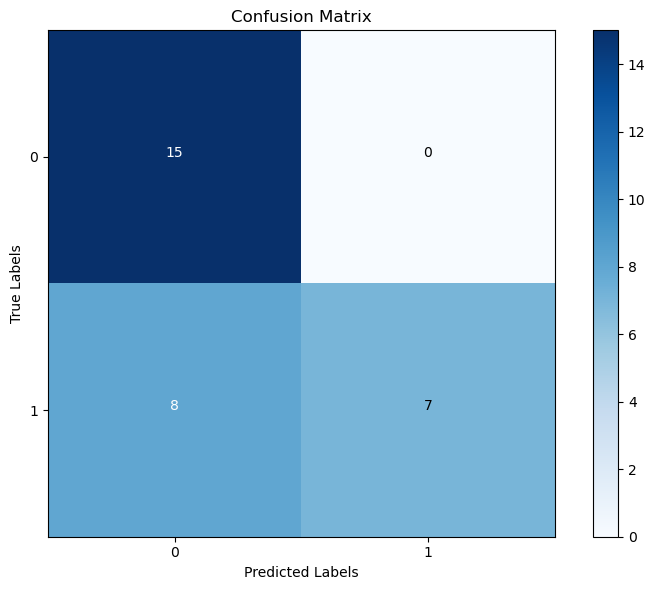

In [11]:
import torch
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have a test DataLoader called test_loader
# Iterate through the test DataLoader
model.eval()
all_predictions = []
all_ground_truth = []
num_correct = 0
total_samples = 0

for ciphertexts, labels in test_loader:
    with torch.no_grad():
        # Preprocess the ciphertexts (convert to tensor and add necessary dimensions)
        preprocessed_ciphertexts = torch.tensor([list(map(int, ciphertext)) for ciphertext in ciphertexts]).unsqueeze(2).float()

        # Pass the preprocessed ciphertexts through the model
        outputs = model(preprocessed_ciphertexts)

        # Get predicted labels
        _, predicted_classes = torch.max(outputs, 1)

        # Count correct predictions
        num_correct += (predicted_classes == labels).sum().item()

        # Append predicted and ground truth labels to lists
        all_predictions.extend(predicted_classes.tolist())
        all_ground_truth.extend(labels.tolist())

        # Update total samples
        total_samples += labels.size(0)

# Convert lists to numpy arrays
all_predictions = np.array(all_predictions)
all_ground_truth = np.array(all_ground_truth)

# Compute confusion matrix
conf_matrix = confusion_matrix(all_ground_truth, all_predictions)

# Compute accuracy
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

# Print accuracy and confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()


# Add annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

# Remove x and y ticks
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])

plt.tight_layout()
plt.show()


In [12]:
all_predictions

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0])

In [13]:
all_ground_truth

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0])

### Using Test Dataset For Feistel Encryption Scheme 

In [58]:
# Load the dataset with the modified collate function

# test_loader=CipherDataset('feistel_ciphertext_distinguisher_dataset.csv')
test_loader=CipherDataset('Dataset_Fiestel/feistel_ciphertext_distinguisher_test_dataset.csv')
test_loader = DataLoader(test_loader, batch_size=32, shuffle=True, collate_fn=collate_fn)

Accuracy: 0.3000

Confusion Matrix:
[[ 9  6]
 [15  0]]


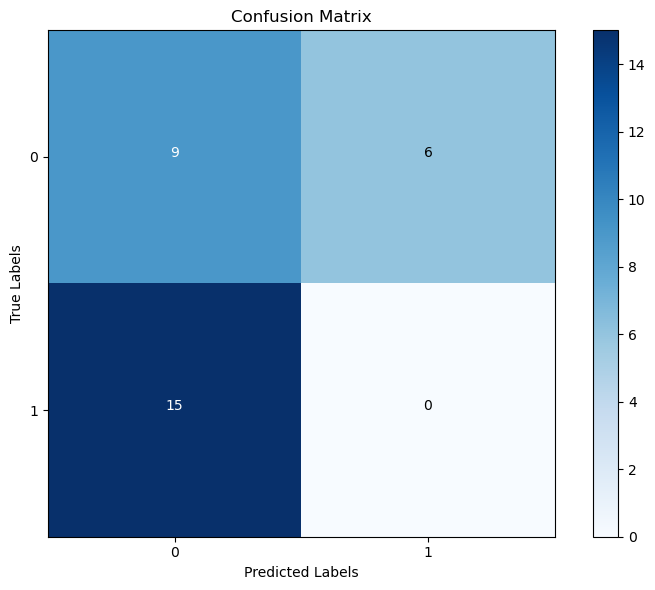

In [50]:
import torch
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have a test DataLoader called test_loader
# Iterate through the test DataLoader
model_feistel.eval()
all_predictions = []
all_ground_truth = []
num_correct = 0
total_samples = 0

for ciphertexts, labels in test_loader:
    with torch.no_grad():
        # Preprocess the ciphertexts (convert to tensor and add necessary dimensions)
        preprocessed_ciphertexts = torch.tensor([list(map(int, ciphertext)) for ciphertext in ciphertexts]).unsqueeze(2).float()

        # Pass the preprocessed ciphertexts through the model
        outputs = model_feistel(preprocessed_ciphertexts)

        # Get predicted labels
        _, predicted_classes = torch.max(outputs, 1)

        # Count correct predictions
        num_correct += (predicted_classes == labels).sum().item()

        # Append predicted and ground truth labels to lists
        all_predictions.extend(predicted_classes.tolist())
        all_ground_truth.extend(labels.tolist())

        # Update total samples
        total_samples += labels.size(0)

# Convert lists to numpy arrays
all_predictions = np.array(all_predictions)
all_ground_truth = np.array(all_ground_truth)

# Compute confusion matrix
conf_matrix = confusion_matrix(all_ground_truth, all_predictions)

# Compute accuracy
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

# Print accuracy and confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()


# Add annotations
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

# Remove x and y ticks
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])

plt.tight_layout()
plt.show()

--------------------------------------------------End of Notebook-------------------------------------------------